In [1]:
from RoutineNetwork import * 
import multiprocessing
import matplotlib.pyplot as plt
from scipy import signal

In [42]:
repeat = 10 
period = 2000

manager = multiprocessing.Manager()
return_dic = manager.dict()

jobs = []

index = 0

N = 15

for V in [0.005, 0.01, 0.02, ]:
    for R in [0, 50, 100, 200]:

        p = multiprocessing.Process(
            target=simulation, args=(
                return_dic, index, repeat, period, N, V, R
            )
        )

        jobs.append(p)
        p.start()

        index += 1
        
for proc in jobs:
    proc.join()

res_dic = {}

for k in return_dic.keys():
    res_dic[k] = return_dic[k]

0 Fri Sep 16 17:03:24 2022
0 Fri Sep 16 17:03:24 2022
0 Fri Sep 16 17:03:24 2022
0 Fri Sep 16 17:03:24 2022
0 Fri Sep 16 17:03:24 2022
0 Fri Sep 16 17:03:24 2022
0 Fri Sep 16 17:03:24 2022
0 Fri Sep 16 17:03:24 2022
0 Fri Sep 16 17:03:24 2022
0 Fri Sep 16 17:03:24 2022
0 Fri Sep 16 17:03:24 2022
0 Fri Sep 16 17:03:24 2022
1 Fri Sep 16 17:03:26 2022
1 Fri Sep 16 17:03:26 2022
1 Fri Sep 16 17:03:26 2022
2 Fri Sep 16 17:03:27 2022
2 Fri Sep 16 17:03:27 2022
2 Fri Sep 16 17:03:27 2022
3 Fri Sep 16 17:03:29 2022
3 Fri Sep 16 17:03:29 2022
1 Fri Sep 16 17:03:29 2022
3 Fri Sep 16 17:03:29 2022
1 Fri Sep 16 17:03:29 2022
4 Fri Sep 16 17:03:30 2022
4 Fri Sep 16 17:03:31 2022
4 Fri Sep 16 17:03:31 2022
5 Fri Sep 16 17:03:32 2022
1 Fri Sep 16 17:03:32 2022
5 Fri Sep 16 17:03:32 2022
5 Fri Sep 16 17:03:32 2022
6 Fri Sep 16 17:03:33 2022
2 Fri Sep 16 17:03:33 2022
6 Fri Sep 16 17:03:34 2022
6 Fri Sep 16 17:03:34 2022
2 Fri Sep 16 17:03:35 2022
7 Fri Sep 16 17:03:35 2022
7 Fri Sep 16 17:03:35 2022
7

In [44]:
def processDriftProbability(routine, order=1):
    """
    routine: a sequence of action 
    order: order of magnitude 
    return: a bool indicator for drift
    """
    
    mean_v = np.mean(routine)
    height = pow(10, order)*mean_v
    
    peaks = signal.find_peaks(routine, height=height)[0]
    
    if len(peaks)==0:
        return 0 
    elif len(peaks)==1:
        if np.mean(routine[peaks[0]+1:]) < np.mean(routine[:peaks[0]-1]):
            return 1
        else:
            return 0 
    else: 
        if np.mean(routine[peaks[-1]+1:]) < np.mean(routine[:peaks[0]-1]):
            return 1
        else:
            return 0

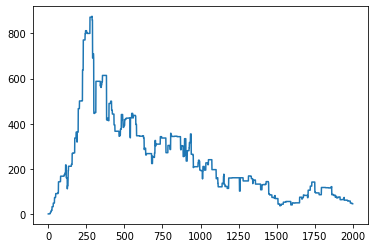

In [47]:
R = 2
V = 2
plt.plot(
    np.array(
        res_dic[V*4+R]
    )[7]
)

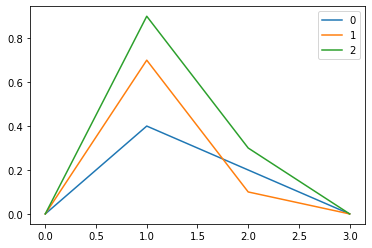

In [48]:
for V in range(3):
    temp = []
    for R in range(4):
        drift_p = []
        for repeat in range(10):
            
            drift_p.append(
                processDriftProbability(
                    res_dic[V*4+R][repeat], 0.5
                )
            )
        temp.append(np.mean(drift_p))
    plt.plot(temp, label=str(V))
plt.legend()